# Ru/B4C Multilayer reflectivity
awojdyla@lbl.gov, March 2025


_Using Claude 3.7 for initial code_
It did work, after fixing some weird imports fix and making sure the units were right

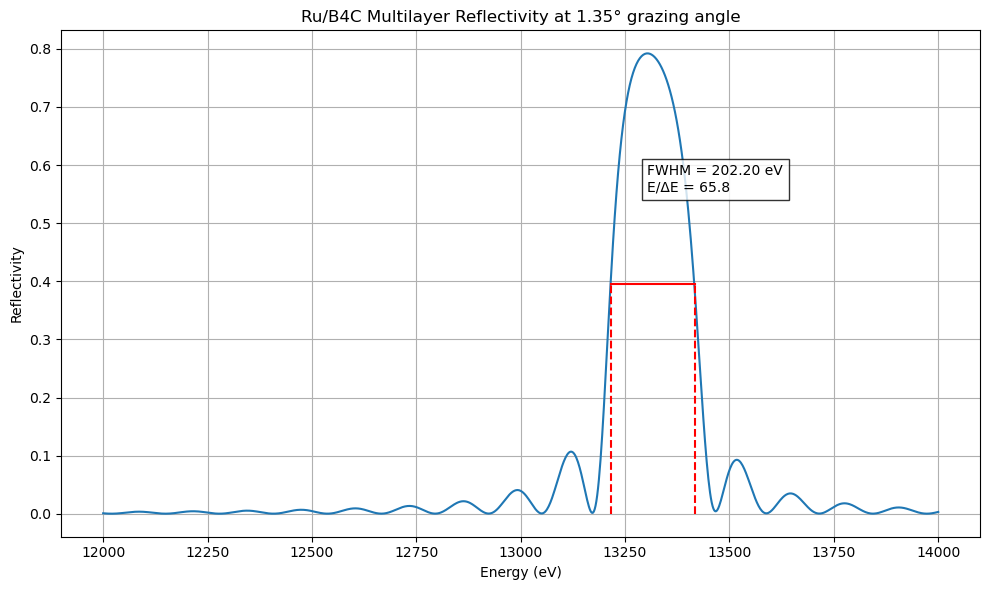

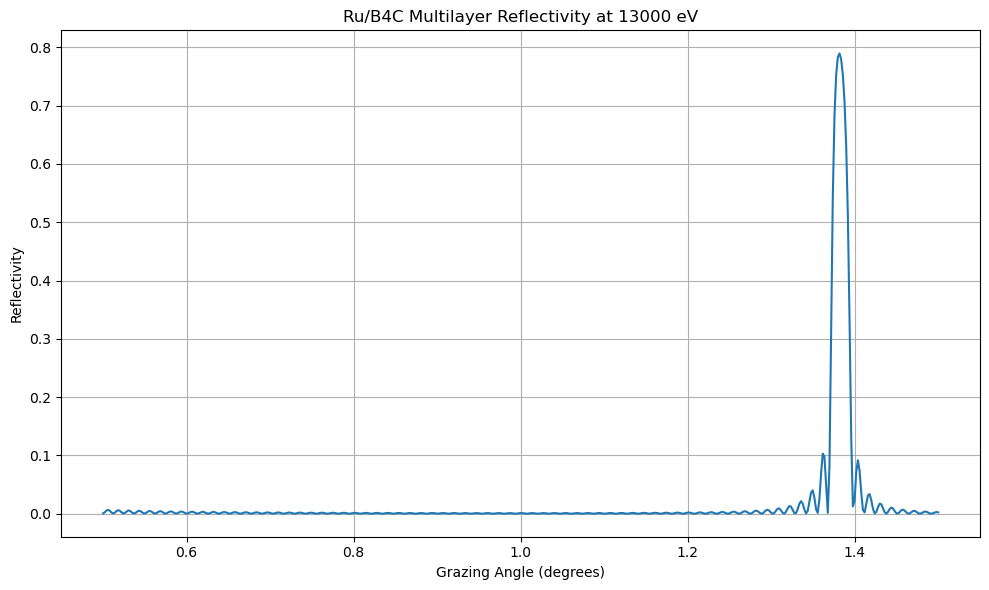

Peak reflectivity: 0.7923
Energy resolution (ΔE/E): 0.015199
Energy resolution (E/ΔE): 65.8
Peak energy: 13303.30 eV


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import xrt.backends.raycing.materials as rm

# Define the energy range around 12 keV
E_central = 13000  # 12 keV in eV
dE = 1000  # Energy range to scan (eV)
energy = np.linspace(E_central - dE, E_central + dE, 1000)

# Define multilayer parameters
# Typical values for Ru/B4C multilayer
d_spacing_A = (2.0)*10  # bilayer thickness in nm (adjust as needed)
gamma = 0.4      # thickness ratio of Ru to the bilayer
N_periods = 100   # number of bilayer periods

# Get the materials
ru = rm.Material('Ru', rho=12.41)  # Ruthenium with density in g/cm³
b4c = rm.Material(('B','C'),(1,4), rho=2.52)  # Boron carbide with density in g/cm³


# Create the multilayer
ml = rm.Multilayer(ru, d_spacing_A*gamma, b4c, d_spacing_A*(1-gamma), N_periods)

# Calculate reflectivity vs energy at a fixed grazing angle
theta = np.deg2rad(1.35)  # grazing angle in radians (adjust for Bragg condition)
reflectivity = np.zeros_like(energy)

for i, E in enumerate(energy):
    refl = ml.get_amplitude(E, np.sin(theta))[0]
    reflectivity[i] = abs(refl)**2

# Plot reflectivity vs energy
plt.figure(figsize=(10, 6))
plt.plot(energy, reflectivity)
plt.xlabel('Energy (eV)')
plt.ylabel('Reflectivity')
plt.title(f'Ru/B4C Multilayer Reflectivity at {theta*180/np.pi:.2f}° grazing angle')
plt.grid(True)

# Calculate energy resolution
max_index = np.argmax(reflectivity)
max_refl = reflectivity[max_index]
max_energy = energy[max_index]

# Find FWHM (Full Width at Half Maximum)
half_max = max_refl / 2
left_idx = np.where(reflectivity[:max_index] <= half_max)[0]
right_idx = np.where(reflectivity[max_index:] <= half_max)[0]

if len(left_idx) > 0 and len(right_idx) > 0:
    left_idx = left_idx[-1]
    right_idx = right_idx[0] + max_index
    fwhm = energy[right_idx] - energy[left_idx]
    energy_resolution = fwhm / max_energy
    
    # Add FWHM markers to the plot
    plt.plot([energy[left_idx], energy[right_idx]], [half_max, half_max], 'r-')
    plt.plot([energy[left_idx], energy[left_idx]], [0, half_max], 'r--')
    plt.plot([energy[right_idx], energy[right_idx]], [0, half_max], 'r--')
    
    # Add text with resolution information
    plt.text(max_energy, max_refl*0.7, 
             f'FWHM = {fwhm:.2f} eV\nE/ΔE = {1/energy_resolution:.1f}',
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Calculate reflectivity vs angle at fixed energy
angles = np.linspace(0.5, 1.5, 500)  # grazing angles in degrees
angle_reflectivity = np.zeros_like(angles)

for i, angle in enumerate(angles):
    theta_rad = np.deg2rad(angle)
    refl = ml.get_amplitude(E_central, np.sin(theta_rad))[0]
    angle_reflectivity[i] = abs(refl)**2

# Plot reflectivity vs angle
plt.figure(figsize=(10, 6))
plt.plot(angles, angle_reflectivity)
plt.xlabel('Grazing Angle (degrees)')
plt.ylabel('Reflectivity')
plt.title(f'Ru/B4C Multilayer Reflectivity at {E_central} eV')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print key results
print(f"Peak reflectivity: {max_refl:.4f}")
if 'energy_resolution' in locals():
    print(f"Energy resolution (ΔE/E): {energy_resolution:.6f}")
    print(f"Energy resolution (E/ΔE): {1/energy_resolution:.1f}")
print(f"Peak energy: {max_energy:.2f} eV")